# 《Python 最優化算法實戰》——從推公式到寫代碼
## 第二章

In [1]:
# 代码2-1，ortools求解现行规划模型
from ortools.sat.python import cp_model

model = cp_model.CpModel()

# 定义变量
x1 = model.NewIntVar(0, 1000, 'x1')
x2 = model.NewIntVar(0, 1000, 'x2')
x3 = model.NewIntVar(0, 1000, 'x3')
x4 = model.NewIntVar(0, 1000, 'x4')
x5 = model.NewIntVar(0, 1000, 'x5')
x6 = model.NewIntVar(0, 1000, 'x6')
x7 = model.NewIntVar(0, 1000, 'x7')
x8 = model.NewIntVar(0, 1000, 'x8')

# 添加约束
model.Add(2*x1 + x2 + x3 + x4 >=100)
model.Add(2*x2 + x3+ 3*x5 + 2*x6 + x7 >=150)
model.Add(x1 + x3 + 3*x4 + 2*x6 + 3*x7 + 5*x8 >=100)

# 添加目标函数
model.Minimize(5*x1 + 6*x2 + 23*x3 + 5*x4 + 24*x5 + 6*x6 + 23*x7 + 5*x8)

# 求解
solver = cp_model.CpSolver()
solver.Solve(model)

print('目标函数值是：', solver.ObjectiveValue())
print('x1 = ', solver.Value(x1))
print('x2 = ', solver.Value(x2))
print('x3 = ', solver.Value(x3))
print('x4 = ', solver.Value(x4))
print('x5 = ', solver.Value(x5))
print('x6 = ', solver.Value(x6))
print('x7 = ', solver.Value(x7))
print('x8 = ', solver.Value(x8))

目标函数值是： 600.0
x1 =  30
x2 =  40
x3 =  0
x4 =  0
x5 =  0
x6 =  35
x7 =  0
x8 =  0


In [3]:
# 代碼 2-2，Gurobi求解線性規劃模型
from gurobipy import *
m = Model("LP model")

# 定义变量
x1 = m.addVar(lb=0, ub=150, vtype=GRB.INTEGER, name='x1')
x2 = m.addVar(lb=0, ub=150, vtype=GRB.INTEGER, name='x2')
x3 = m.addVar(lb=0, ub=150, vtype=GRB.INTEGER, name='x3')
x4 = m.addVar(lb=0, ub=150, vtype=GRB.INTEGER, name='x4')
x5 = m.addVar(lb=0, ub=150, vtype=GRB.INTEGER, name='x5')
x6 = m.addVar(lb=0, ub=150, vtype=GRB.INTEGER, name='x6')
x7 = m.addVar(lb=0, ub=150, vtype=GRB.INTEGER, name='x7')
x8 = m.addVar(lb=0, ub=150, vtype=GRB.INTEGER, name='x8')

# 添加约束
m.addConstr(2*x1 + x2 + x3 + x4 >= 100)
m.addConstr(2*x2 + x3 + 3*x5 + 2*x6 + x7 >=150)
m.addConstr(x1 + x3 + 3*x4 + 2*x6 + 3*x7 + 5*x8 >=100)

# 添加目标函数
m.setObjective(5*x1 + 6*x2 + 23*x3 + 5*x4 + 24*x5 + 6*x6 +23*x7 + 5*x8, GRB.MINIMIZE)

# 求解
m.optimize()
print('最优值：', m.objVal)
for v in m.getVars():
    print('参数', v.varName, '=', v.x)

Using license file /home/fern/下载/gurobi9.0.3_linux64/gurobi903/linux64/gurobi.lic
Academic license - for non-commercial use only
Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (linux64)
Optimize a model with 3 rows, 8 columns and 15 nonzeros
Model fingerprint: 0xe8479eef
Variable types: 0 continuous, 8 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+00]
  Objective range  [5e+00, 2e+01]
  Bounds range     [2e+02, 2e+02]
  RHS range        [1e+02, 2e+02]
Found heuristic solution: objective 3950.0000000
Presolve time: 0.00s
Presolved: 3 rows, 8 columns, 15 nonzeros
Variable types: 0 continuous, 8 integer (0 binary)

Root relaxation: objective 6.000000e+02, 3 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0     600.0000000  600.00000  0.00%     -    0s

Explored 0 nodes (3 simplex iterations) in 0.05 seconds
T

In [2]:
# 代碼2-16 Numpy解線性代數
# 线性代数
import numpy as np

A = np.array([
    [1, -2, 1],
    [0, 2, -8],
    [-4, 5, 9]
])
B = np.array([0, -8, 9])

result = np.linalg.solve(A, B)
print('x=', result[0])
print('y=', result[1])
print('z=', result[2])
# 输出
# x= -29.0  y= -16.0  z= -3.0

x= -29.0
y= -16.0
z= -3.0


## 第九章 智能優化算法

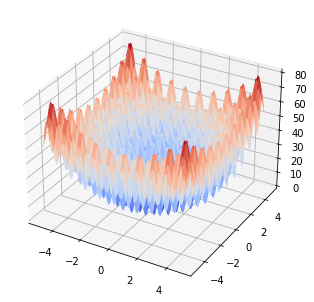

<Figure size 432x288 with 0 Axes>

In [5]:
# 代碼9-1，繪制Rastrigin函數圖像
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# 生成X和Y的数据
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)

# 目标函数
A = 10
Z = 2 * A + X ** 2 - A * np.cos(2 * np.pi * X) + Y ** 2 - A * np.cos(2 * np.pi * Y)

# 绘图
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
plt.figure()
plt.show()

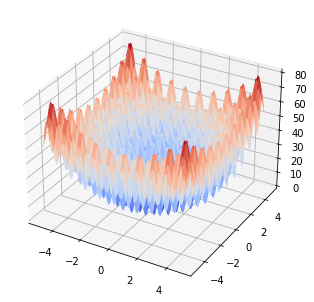

In [6]:
# 代碼9-1，繪制Rastrigin函數圖像
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# 生成X和Y的数据
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)

# 目标函数
A = 10
Z = 2 * A + X ** 2 - A * np.cos(2 * np.pi * X) + Y ** 2 - A * np.cos(2 * np.pi * Y)

# 绘图
fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
plt.show()

In [7]:
# 代碼9-2，PSO算法解Rasrigin最小值
# 速度
# Vi+1 = w*Vi + c1 * r1 * (pbest_i - Xi) + c2 * r2 * (gbest_i - Xi)
# 位置
# Xi+1 = Xi + Vi+1
# vi, xi 分别表示粒子第i维的速度和位置
# pbest_i, gbest_i 分别表示某个粒子最好位置第i维的值、整个种群最好位置第i维的值

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

def fitness_func(X):
    """计算粒子的的适应度值，也就是目标函数值，X 的维度是 size * 2 """
    A = 10
    pi = np.pi
    x = X[:, 0]
    y = X[:, 1]
    return 2 * A + x ** 2 - A * np.cos(2 * pi * x) + y ** 2 - A * np.cos(2 * pi * y)

def velocity_update(V, X, pbest, gbest, c1, c2, w, max_val):
    """
    根据速度更新公式更新每个粒子的速度
    :param V: 粒子当前的速度矩阵，20*2 的矩阵
    :param X: 粒子当前的位置矩阵，20*2 的矩阵
    :param pbest: 每个粒子历史最优位置，20*2 的矩阵
    :param gbest: 种群历史最优位置，1*2 的矩阵
    """
    size = X.shape[0]
    r1 = np.random.random((size, 1))
    r2 = np.random.random((size, 1))
    V = w * V + c1 * r1 * (pbest - X) + c2 * r2 * (gbest - X)  # 直接对照公式写就好了
    # 防止越界处理
    V[V < -max_val] = -max_val
    V[V > max_val] = max_val
    return V

def position_update(X, V):
    """
    根据公式更新粒子的位置
    :param X: 粒子当前的位置矩阵，维度是 20*2
    :param V: 粒子当前的速度举着，维度是 20*2
    """
    return X + V

def pso():
    # PSO的参数
    w = 1  # 惯性因子，一般取1
    c1 = 2  # 学习因子，一般取2
    c2 = 2  #
    r1 = None  # 为两个（0,1）之间的随机数
    r2 = None
    dim = 2  # 维度的维度
    size = 20  # 种群大小，即种群中小鸟的个数
    iter_num = 1000  # 算法最大迭代次数
    max_val = 0.5  # 限制粒子的最大速度为0.5
    best_fitness = float(9e10)  # 初始的适应度值，在迭代过程中不断减小这个值
    fitneess_value_list = []  # 记录每次迭代过程中的种群适应度值变化
    # 初始化种群的各个粒子的位置
    # 用一个 20*2 的矩阵表示种群，每行表示一个粒子
    X = np.random.uniform(-5, 5, size=(size, dim))
    # 初始化种群的各个粒子的速度
    V = np.random.uniform(-0.5, 0.5, size=(size, dim))
    # 计算种群各个粒子的初始适应度值
    p_fitness = fitness_func(X)
    # 计算种群的初始最优适应度值
    g_fitness = p_fitness.min()
    # 讲添加到记录中
    fitneess_value_list.append(g_fitness)
    # 初始的个体最优位置和种群最优位置
    pbest = X
    gbest = X[p_fitness.argmin()]
    # 接下来就是不断迭代了
    for i in range(1, iter_num):
        V = velocity_update(V, X, pbest, gbest, c1, c2, w, max_val)  # 更新速度
        X = position_update(X, V)  # 更新位置
        p_fitness2 = fitness_func(X)  # 计算各个粒子的适应度
        g_fitness2 = p_fitness2.min()  # 计算群体的最优适应度
        # 更新每个粒子的历史最优位置
        for j in range(size):
            if p_fitness[j] > p_fitness2[j]:
                pbest[j] = X[j]
                p_fitness[j] = p_fitness2[j]
        # 更新群体的最优位置
        if g_fitness > g_fitness2:
            gbest = X[p_fitness2.argmin()]
            g_fitness = g_fitness2
        # 记录最优迭代结果
        fitneess_value_list.append(g_fitness)
        # 迭代次数+1
        i += 1

# 打印迭代的结果
print("最优值是：%.5f" % fitneess_value_list[-1])
print("最优解是：x=%.5f, y=%.5f" % gbest)
# 最优值是：0.00000
# 最优解是：x=0.00000, y=-0.00000

# 绘图
plt.plot(fitneess_value_list, color='r')
plt.title('迭代过程')

NameError: name 'fitneess_value_list' is not defined

**上爲添加plt.figure()，下爲添加%matplotlib inline**

迭代最优结果是：0.00000
迭代最优变量是：x=-0.00004, y=-0.00005
迭代约束惩罚项是： 0.0


Text(0.5, 1.0, '迭代过程')

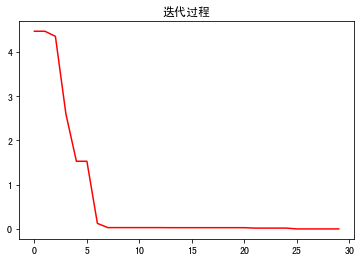

In [8]:
# 代碼9-3，PSO解帶約束優化問題
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# PSO的参数
w = 1  # 惯性因子，一般取1
c1 = 2  # 学习因子，一般取2
c2 = 2  #
r1 = None  # 为两个（0,1）之间的随机数
r2 = None
dim = 2  # 维度的维度
size = 100  # 种群大小，即种群中小鸟的个数
iter_num = 1000  # 算法最大迭代次数
max_vel = 0.5  # 限制粒子的最大速度为0.5
fitneess_value_list = []  # 记录每次迭代过程中的种群适应度值变化

def calc_f(X):
    """计算粒子的的适应度值，也就是目标函数值，X 的维度是 size * 2 """
    A = 10
    pi = np.pi
    x = X[0]
    y = X[1]
    return 2 * A + x ** 2 - A * np.cos(2 * pi * x) + y ** 2 - A * np.cos(2 * pi * y)

def calc_e1(X):
    """计算第一个约束的惩罚项"""
    e = X[0] + X[1] - 6
    return max(0, e)

def calc_e2(X):
    """计算第二个约束的惩罚项"""
    e = 3 * X[0] - 2 * X[1] - 5
    return max(0, e)

def calc_Lj(e1, e2):
    """根据每个粒子的约束惩罚项计算Lj权重值，e1, e2列向量，表示每个粒子的第1个第2个约束的惩罚项值"""
    # 注意防止分母为零的情况
    if (e1.sum() + e2.sum()) <= 0:
        return 0, 0
    else:
        L1 = e1.sum() / (e1.sum() + e2.sum())
        L2 = e2.sum() / (e1.sum() + e2.sum())
    return L1, L2

def velocity_update(V, X, pbest, gbest):
    """
    根据速度更新公式更新每个粒子的速度
    :param V: 粒子当前的速度矩阵，20*2 的矩阵
    :param X: 粒子当前的位置矩阵，20*2 的矩阵
    :param pbest: 每个粒子历史最优位置，20*2 的矩阵
    :param gbest: 种群历史最优位置，1*2 的矩阵
    """
    r1 = np.random.random((size, 1))
    r2 = np.random.random((size, 1))
    V = w * V + c1 * r1 * (pbest - X) + c2 * r2 * (gbest - X)  # 直接对照公式写就好了
    # 防止越界处理
    V[V < -max_vel] = -max_vel
    V[V > max_vel] = max_vel
    return V

def position_update(X, V):
    """
    根据公式更新粒子的位置
    :param X: 粒子当前的位置矩阵，维度是 20*2
    :param V: 粒子当前的速度举着，维度是 20*2
    """
    return X + V

def update_pbest(pbest, pbest_fitness, pbest_e, xi, xi_fitness, xi_e):
    """
    判断是否需要更新粒子的历史最优位置
    :param pbest: 历史最优位置
    :param pbest_fitness: 历史最优位置对应的适应度值
    :param pbest_e: 历史最优位置对应的约束惩罚项
    :param xi: 当前位置
    :param xi_fitness: 当前位置的适应度函数值
    :param xi_e: 当前位置的约束惩罚项
    :return:
    """
    # 下面的 0.0000001 是考虑到计算机的数值精度位置，值等同于0
    # 规则1，如果 pbest 和 xi 都没有违反约束，则取适应度小的
    if pbest_e <= 0.0000001 and xi_e <= 0.0000001:
        if pbest_fitness <= xi_fitness:
            return pbest, pbest_fitness, pbest_e
        else:
            return xi, xi_fitness, xi_e
    # 规则2，如果当前位置违反约束而历史最优没有违反约束，则取历史最优
    if pbest_e < 0.0000001 and xi_e >= 0.0000001:
        return pbest, pbest_fitness, pbest_e
    # 规则3，如果历史位置违反约束而当前位置没有违反约束，则取当前位置
    if pbest_e >= 0.0000001 and xi_e < 0.0000001:
        return xi, xi_fitness, xi_e
    # 规则4，如果两个都违反约束，则取适应度值小的
    if pbest_fitness <= xi_fitness:
        return pbest, pbest_fitness, pbest_e
    else:
        return xi, xi_fitness, xi_e

def update_gbest(gbest, gbest_fitness, gbest_e, pbest, pbest_fitness, pbest_e):
    """
    更新全局最优位置
    :param gbest: 上一次迭代的全局最优位置
    :param gbest_fitness: 上一次迭代的全局最优位置的适应度值
    :param gbest_e:上一次迭代的全局最优位置的约束惩罚项
    :param pbest:当前迭代种群的最优位置
    :param pbest_fitness:当前迭代的种群的最优位置的适应度值
    :param pbest_e:当前迭代的种群的最优位置的约束惩罚项
    :return:
    """
    # 先对种群，寻找约束惩罚项=0的最优个体，如果每个个体的约束惩罚项都大于0，就找适应度最小的个体
    pbest2 = np.concatenate([pbest, pbest_fitness.reshape(-1, 1), pbest_e.reshape(-1, 1)], axis=1)  # 将几个矩阵拼接成矩阵
    pbest2_1 = pbest2[pbest2[:, -1] <= 0.0000001]  # 找出没有违反约束的个体
    if len(pbest2_1) > 0:
        pbest2_1 = pbest2_1[pbest2_1[:, 2].argsort()]  # 根据适应度值排序
    else:
        pbest2_1 = pbest2[pbest2[:, 2].argsort()]  # 如果所有个体都违反约束，直接找出适应度值最小的
    # 当前迭代的最优个体
    pbesti, pbesti_fitness, pbesti_e = pbest2_1[0, :2], pbest2_1[0, 2], pbest2_1[0, 3]
    # 当前最优和全局最优比较
    # 如果两者都没有约束
    if gbest_e <= 0.0000001 and pbesti_e <= 0.0000001:
        if gbest_fitness < pbesti_fitness:
            return gbest, gbest_fitness, gbest_e
        else:
            return pbesti, pbesti_fitness, pbesti_e
    # 有一个违反约束而另一个没有违反约束
    if gbest_e <= 0.0000001 and pbesti_e > 0.0000001:
        return gbest, gbest_fitness, gbest_e
    if gbest_e > 0.0000001 and pbesti_e <= 0.0000001:
        return pbesti, pbesti_fitness, pbesti_e
    # 如果都违反约束，直接取适应度小的
    if gbest_fitness < pbesti_fitness:
        return gbest, gbest_fitness, gbest_e
    else:
        return pbesti, pbesti_fitness, pbesti_e

# 初始化一个矩阵 info, 记录：
# 1、种群每个粒子的历史最优位置对应的适应度，
# 2、历史最优位置对应的惩罚项，
# 3、当前适应度，
# 4、当前目标函数值，
# 5、约束1惩罚项，
# 6、约束2惩罚项，
# 7、惩罚项的和
# 所以列的维度是7
info = np.zeros((size, 7))

# 初始化种群的各个粒子的位置
# 用一个 20*2 的矩阵表示种群，每行表示一个粒子
X = np.random.uniform(-5, 5, size=(size, dim))

# 初始化种群的各个粒子的速度
V = np.random.uniform(-0.5, 0.5, size=(size, dim))

# 初始化粒子历史最优位置为当当前位置
pbest = X
# 计算每个粒子的适应度
for i in range(size):
    info[i, 3] = calc_f(X[i])  # 目标函数值
    info[i, 4] = calc_e1(X[i])  # 第一个约束的惩罚项
    info[i, 5] = calc_e2(X[i])  # 第二个约束的惩罚项

# 计算惩罚项的权重，及适应度值
L1, L2 = calc_Lj(info[i, 4], info[i, 5])
info[:, 2] = info[:, 3] + L1 * info[:, 4] + L2 * info[:, 5]  # 适应度值
info[:, 6] = L1 * info[:, 4] + L2 * info[:, 5]  # 惩罚项的加权求和

# 历史最优
info[:, 0] = info[:, 2]  # 粒子的历史最优位置对应的适应度值
info[:, 1] = info[:, 6]  # 粒子的历史最优位置对应的惩罚项值

# 全局最优
gbest_i = info[:, 0].argmin()  # 全局最优对应的粒子编号
gbest = X[gbest_i]  # 全局最优粒子的位置
gbest_fitness = info[gbest_i, 0]  # 全局最优位置对应的适应度值
gbest_e = info[gbest_i, 1]  # 全局最优位置对应的惩罚项

# 记录迭代过程的最优适应度值
fitneess_value_list.append(gbest_fitness)
# 接下来开始迭代
for j in range(iter_num):
    # 更新速度
    V = velocity_update(V, X, pbest=pbest, gbest=gbest)
    # 更新位置
    X = position_update(X, V)
    # 计算每个粒子的目标函数和约束惩罚项
    for i in range(size):
        info[i, 3] = calc_f(X[i])  # 目标函数值
        info[i, 4] = calc_e1(X[i])  # 第一个约束的惩罚项
        info[i, 5] = calc_e2(X[i])  # 第二个约束的惩罚项
    # 计算惩罚项的权重，及适应度值
    L1, L2 = calc_Lj(info[i, 4], info[i, 5])
    info[:, 2] = info[:, 3] + L1 * info[:, 4] + L2 * info[:, 5]  # 适应度值
    info[:, 6] = L1 * info[:, 4] + L2 * info[:, 5]  # 惩罚项的加权求和
    # 更新历史最优位置
    for i in range(size):
        pbesti = pbest[i]
        pbest_fitness = info[i, 0]
        pbest_e = info[i, 1]
        xi = X[i]
        xi_fitness = info[i, 2]
        xi_e = info[i, 6]
        # 计算更新个体历史最优
        pbesti, pbest_fitness, pbest_e = \
            update_pbest(pbesti, pbest_fitness, pbest_e, xi, xi_fitness, xi_e)
        pbest[i] = pbesti
        info[i, 0] = pbest_fitness
        info[i, 1] = pbest_e
    # 更新全局最优
    pbest_fitness = info[:, 2]
    pbest_e = info[:, 6]
    gbest, gbest_fitness, gbest_e = \
        update_gbest(gbest, gbest_fitness, gbest_e, pbest, pbest_fitness, pbest_e)
    # 记录当前迭代全局之硬度
    fitneess_value_list.append(gbest_fitness)

# 最后绘制适应度值曲线
print('迭代最优结果是：%.5f' % calc_f(gbest))
print('迭代最优变量是：x=%.5f, y=%.5f' % (gbest[0], gbest[1]))
print('迭代约束惩罚项是：', gbest_e)

# 迭代最优结果是：0.00000
# 迭代最优变量是：x=-0.00001, y=0.00002
# 迭代约束惩罚项是： 0.0
# 从结果看，有多个不同的解的目标函数值是相同的，多测试几次就发现了

# 绘图
plt.plot(fitneess_value_list[: 30], color='r')
plt.title('迭代过程')

Text(0.5, 1.0, '城市坐标图')

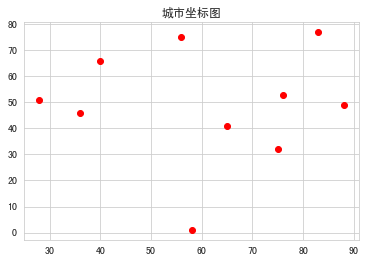

In [10]:
# 9-4 繪制城市坐標
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set_style("whitegrid")
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# 固定随机数种子
np.random.seed(1234)

# 一些参数
city_num = 10  # 城市的数量
iter_num = 1000  # 算法最大迭代次数

# 随机生成city_num个城市的坐标，注意是不放回抽样
X = np.random.choice(list(range(1, 100)), size=city_num, replace=False)
Y = np.random.choice(list(range(1, 100)), size=city_num, replace=False)

plt.scatter(X, Y, color='r')
plt.title('城市坐标图')

迭代最优结果是： 230.3446251317056
迭代最优变量是： [5 8 2 3 6 1 7 0 4 9]


Text(0.5, 1.0, 'TSP路径规划结果')

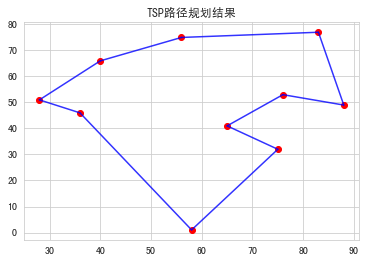

In [1]:
# 9-5 PSO解TSP问题
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set_style("whitegrid")
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

# 固定随机数种子
np.random.seed(1234)

# 一些参数
city_num = 10  # 城市的数量
size = 50  # 种群大小，即粒子的个数
r1 = 0.7  # pbest-xi 的保留概率
r2 = 0.8  # gbest-xi 的保留概率
iter_num = 1000  # 算法最大迭代次数
fitneess_value_list = []  # 每一步迭代的最优解

# 随机生成city_num个城市的坐标，注意是不放回抽样
X = np.random.choice(list(range(1, 100)), size=city_num, replace=False)
Y = np.random.choice(list(range(1, 100)), size=city_num, replace=False)

# 计算城市之间的距离
def calculate_distance(X, Y):
    """
    计算城市两辆之间的欧式距离，结果用numpy矩阵存储
    :param X: 城市的X坐标，np.array数组
    :param Y: 城市的Y坐标，np.array数组
    """
    distance_matrix = np.zeros((city_num, city_num))
    for i in range(city_num):
        for j in range(city_num):
            if i == j:
                continue
            dis = np.sqrt((X[i] - X[j]) ** 2 + (Y[i] - Y[j]) ** 2)  # 欧式距离计算
            distance_matrix[i][j] = dis
    return distance_matrix

def fitness_func(distance_matrix, xi):
    """
    适应度函数，计算目标函数值.
    :param distance: 城市的距离矩阵
    :param xi: PSO的一个解
    :return: 目标函数值，即总距离
    """
    total_distance = 0
    for i in range(1, city_num):
        start = xi[i - 1]
        end = xi[i]
        total_distance += distance_matrix[start][end]
    total_distance += distance_matrix[end][xi[0]]  # 从最后一个城市回到出发城市
    return total_distance

def plot_tsp(gbest):
    """绘制最优解的图形"""
    plt.scatter(X, Y, color='r')
    for i in range(1, city_num):
        start_x, start_y = X[gbest[i - 1]], Y[gbest[i - 1]]
        end_x, end_y = X[gbest[i]], Y[gbest[i]]
        plt.plot([start_x, end_x], [start_y, end_y], color='b', alpha=0.8)
    start_x, start_y = X[gbest[0]], Y[gbest[0]]
    plt.plot([start_x, end_x], [start_y, end_y], color='b', alpha=0.8)

def get_ss(xbest, xi, r):
    """
    计算交换序列，即 x2 经过交换序列ss得到x1，对应PSO速度更新公式的：
    r1(pbest-xi) 和 r2(gbest-xi)
    :param xbest: pbest 或者 gbest
    :param xi: 例子当前解
    :return:
    """
    velocity_ss = []
    for i in range(len(xi)):
        if xi[i] != xbest[i]:
            j = np.where(xi == xbest[i])[0][0]
            so = (i, j, r)  # 得到交换子
            velocity_ss.append(so)
            xi[i], xi[j] = xi[j], xi[i]  # 执行交换操作
    return velocity_ss

def do_ss(xi, ss):
    """
    执行交换操作
    :param xi:
    :param ss: 由交换子组成的交换序列
    :return:
    """
    for i, j, r in ss:
        rand = np.random.random()
        if rand <= r:
            xi[i], xi[j] = xi[j], xi[i]
    return xi

# 计算城市之间的距离矩阵
distance_matrix = calculate_distance(X, Y)

# 初始化种群的各个粒子的位置，作为个体的历史最优解pbest
# 用一个 50*10 的矩阵表示种群，每行表示一个粒子, 每一行是0-9不重复随机数，表示城市访问的顺序
XX = np.zeros((size, city_num), dtype=np.int)
for i in range(size):
    XX[i] = np.random.choice(list(range(city_num)), size=city_num, replace=False)

# 计算每个粒子对应适应度
pbest = XX
pbest_fitness = np.zeros((size, 1))
for i in range(size):
    pbest_fitness[i] = fitness_func(distance_matrix, xi=XX[i])

# 计算全局适应度和对应的解gbest
gbest = XX[pbest_fitness.argmin()]
gbest_fitness = pbest_fitness.min()

# 记录算法迭代效果
fitneess_value_list.append(gbest_fitness)

# 下面开始迭代
for i in range(iter_num):
    for j in range(size):  # 对每个粒子迭代
        pbesti = pbest[j].copy()  # 此处要用copy，不然出现浅拷贝问题
        xi = XX[j].copy()
        # 计算交换序列，即 v = r1(pbest-xi) + r2(gbest-xi)
        ss1 = get_ss(pbesti, xi, r1)
        ss2 = get_ss(gbest, xi, r2)
        ss = ss1 + ss2
        # 执行交换操作，即 x = x + v
        xi = do_ss(xi, ss)
        # 判断是否更优
        fitness_new = fitness_func(distance_matrix, xi)
        fitness_old = pbest_fitness[j]
        if fitness_new < fitness_old:
            pbest_fitness[j] = fitness_new
            pbest[j] = xi
    # 判断全局是否更优
    gbest_fitness_new = pbest_fitness.min()
    gbest_new = pbest[pbest_fitness.argmin()]
    if gbest_fitness_new < gbest_fitness:
        gbest_fitness = gbest_fitness_new
        gbest = gbest_new
    # 加入到列表
    fitneess_value_list.append(gbest_fitness)

# 打印迭代的结果
print('迭代最优结果是：', gbest_fitness)
print('迭代最优变量是：', gbest)
# 迭代最优结果是： 230.344
# 迭代最优变量是： [5 8 2 3 6 1 7 0 4 9]

# 绘制TSP路径图
plot_tsp(gbest)
plt.title('TSP路径规划结果')

In [1]:
 # 查看缓存文件在哪里
import matplotlib as mpl 
mpl.get_cachedir()

'/home/fern/.cache/matplotlib'

In [2]:
 # 查看配置文件路径
import matplotlib as mpl 
mpl.matplotlib_fname()

'/home/fern/.local/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'

In [3]:
# 解决显示中文乱码问题
# https://blog.csdn.net/weixin_47216116/article/details/108408247?utm_medium=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-1.edu_weight&depth_1-utm_source=distribute.pc_relevant.none-task-blog-BlogCommendFromMachineLearnPai2-1.edu_weight
import matplotlib
print(matplotlib.matplotlib_fname())

/home/fern/.local/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc


In [4]:
from matplotlib.font_manager import _rebuild
_rebuild()

In [9]:
# 9-6 遗传算法解决Ratrigin最小值
import numpy as np
import matplotlib.pyplot as plt

def fitness_func(X):
    # 目标函数，即适应度值，X是种群的表现型
    a = 10
    pi = np.pi
    x = X[:, 0]
    y = X[:, 1]
    return 2 * a + x ** 2 - a * np.cos(2 * pi * x) + y ** 2 - a * np.cos(2 * 3.14 * y)


def decode(x, a, b):
    """解码，即基因型到表现型"""
    xt = 0
    for i in range(len(x)):
        xt = xt + x[i] * np.power(2, i)
    return a + xt * (b - a) / (np.power(2, len(x)) - 1)

def decode_X(X: np.array):
    """对整个种群的基因解码，上面的decode是对某个染色体的某个变量进行解码"""
    X2 = np.zeros((X.shape[0], 2))
    for i in range(X.shape[0]):
        xi = decode(X[i, :20], -5, 5)
        yi = decode(X[i, 20:], -5, 5)
        X2[i, :] = np.array([xi, yi])
    return X2

def select(X, fitness):
    """根据轮盘赌法选择优秀个体"""
    fitness = 1 / fitness  # fitness越小表示越优秀，被选中的概率越大，做 1/fitness 处理
    fitness = fitness / fitness.sum()  # 归一化
    idx = np.array(list(range(X.shape[0])))
    X2_idx = np.random.choice(idx, size=X.shape[0], p=fitness)  # 根据概率选择
    X2 = X[X2_idx, :]
    return X2

def crossover(X, c):
    """按顺序选择2个个体以概率c进行交叉操作"""
    for i in range(0, X.shape[0], 2):
        xa = X[i, :]
        xb = X[i + 1, :]
        for j in range(X.shape[1]):
            # 产生0-1区间的均匀分布随机数，判断是否需要进行交叉替换
            if np.random.rand() <= c:
                xa[j], xb[j] = xb[j], xa[j]
        X[i, :] = xa
        X[i + 1, :] = xb
    return X

def mutation(X, m):
    """变异操作"""
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if np.random.rand() <= m:
                X[i, j] = (X[i, j] + 1) % 2
    return X

def ga():
    """遗传算法主函数"""
    c = 0.3  # 交叉概率
    m = 0.05  # 变异概率
    best_fitness = []  # 记录每次迭代的效果
    best_xy = []
    iter_num = 100  # 最大迭代次数
    X0 = np.random.randint(0, 2, (50, 40))  # 随机初始化种群，为50*40的0-1矩阵
    for i in range(iter_num):
        X1 = decode_X(X0)  # 染色体解码
        fitness = fitness_func(X1)  # 计算个体适应度
        X2 = select(X0, fitness)  # 选择操作
        X3 = crossover(X2, c)  # 交叉操作
        X4 = mutation(X3, m)  # 变异操作
        # 计算一轮迭代的效果
        X5 = decode_X(X4)
        fitness = fitness_func(X5)
        best_fitness.append(fitness.min())
        x, y = X5[fitness.argmin()]
        best_xy.append((x, y))
        X0 = X4
    # 多次迭代后的最终效果
    print("最优值是：%.5f" % best_fitness[-1])

    print("最优解是：x=%.5f, y=%.5f" % best_xy[-1])
    # 最优值是：0.00000
    # 最优解是：x=0.00000, y=-0.00000
    # 打印效果
    plt.plot(best_fitness, color='r')

In [ ]:
# 代码9-9 Geatpy解带约束优化问题的目标函数文件
